<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

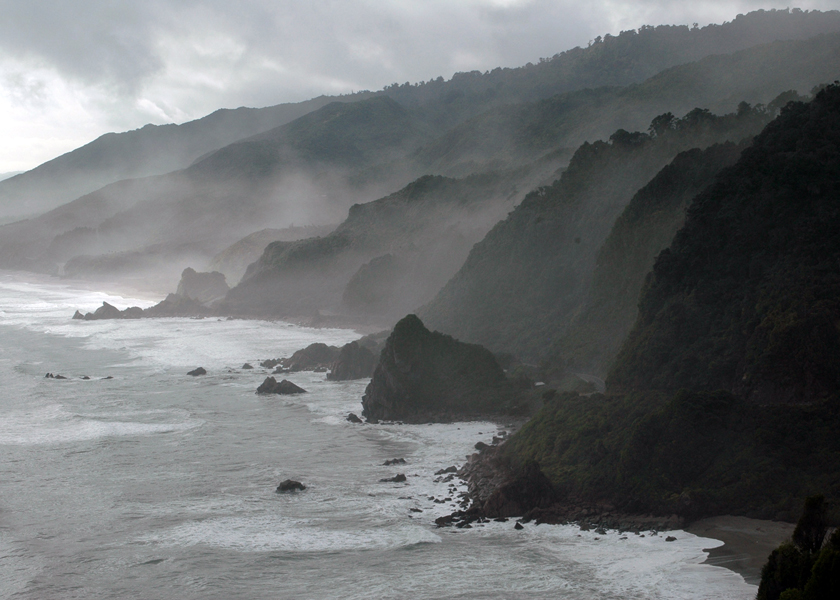

In [3]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image.
Image(filename="New_Zealand_Coast.jpg")

# Addition or Brightness

In [65]:
arr1 = np.array([200, 250], dtype=np.uint8).reshape(-1, 1)
arr2 = np.array([40, 40], dtype=np.uint8).reshape(-1, 1)
add_numpy = arr1+arr2
add_cv2 = cv2.add(arr1, arr2)
print(add_numpy)
print(add_cv2)

[[240]
 [ 34]]
[[240]
 [255]]


In [5]:
matrix = np.ones(img_bgr.shape, dtype="uint8") * 50
print(matrix)
cv2.TH

[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ...

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]]


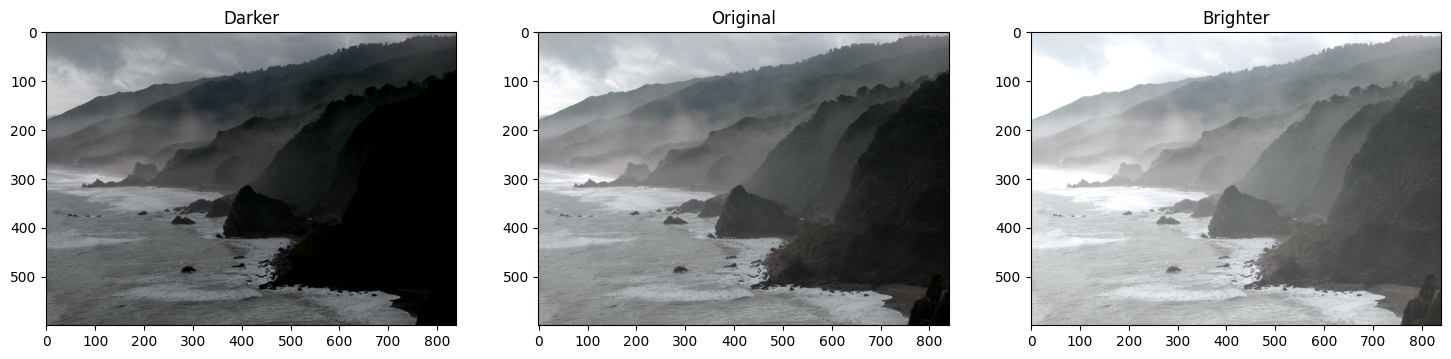

In [6]:
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb_darker)
plt.title("Darker")

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1, 3, 3)
plt.imshow(img_rgb_brighter)
plt.title("Brighter")

plt.show()

# Multiplication or Contrast

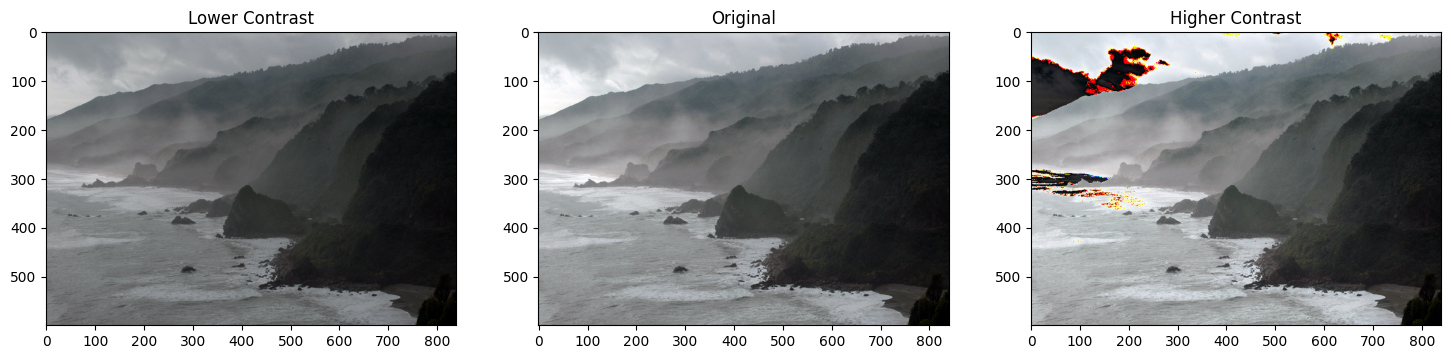

In [8]:
matrix1 = np.ones(img_rgb.shape)* 0.8
matrix2 = np.ones(img_rgb.shape)* 1.2

img_rgb_contrast1 = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_contrast2 = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb_contrast1)
plt.title("Lower Contrast")

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1, 3, 3)
plt.imshow(img_rgb_contrast2)
plt.title("Higher Contrast")

plt.show()

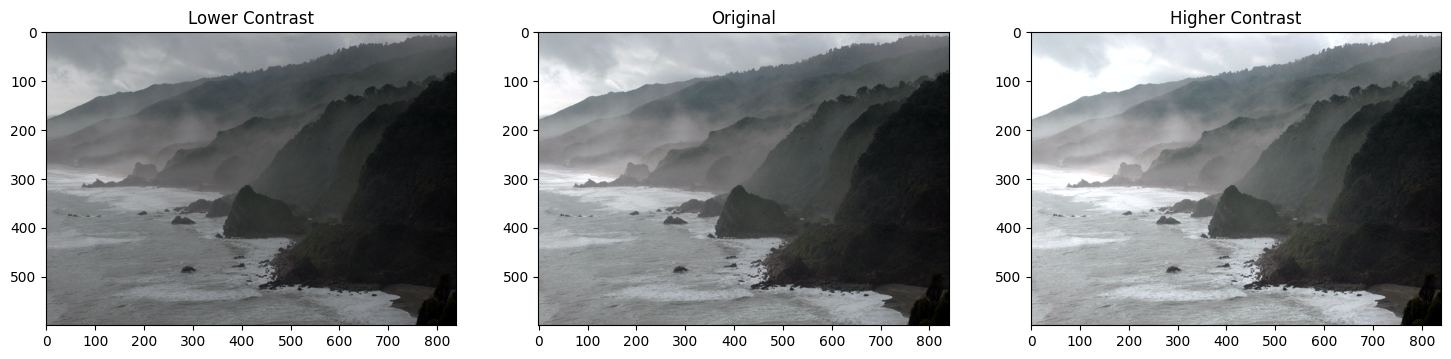

In [10]:
matrix1 = np.ones(img_rgb.shape)* 0.8
matrix2 = np.ones(img_rgb.shape)* 1.2

img_rgb_contrast1 = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_contrast2 = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0, 255))

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb_contrast1)
plt.title("Lower Contrast")

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(1, 3, 3)
plt.imshow(img_rgb_contrast2)
plt.title("Higher Contrast")

plt.show()

# Image Thresholding

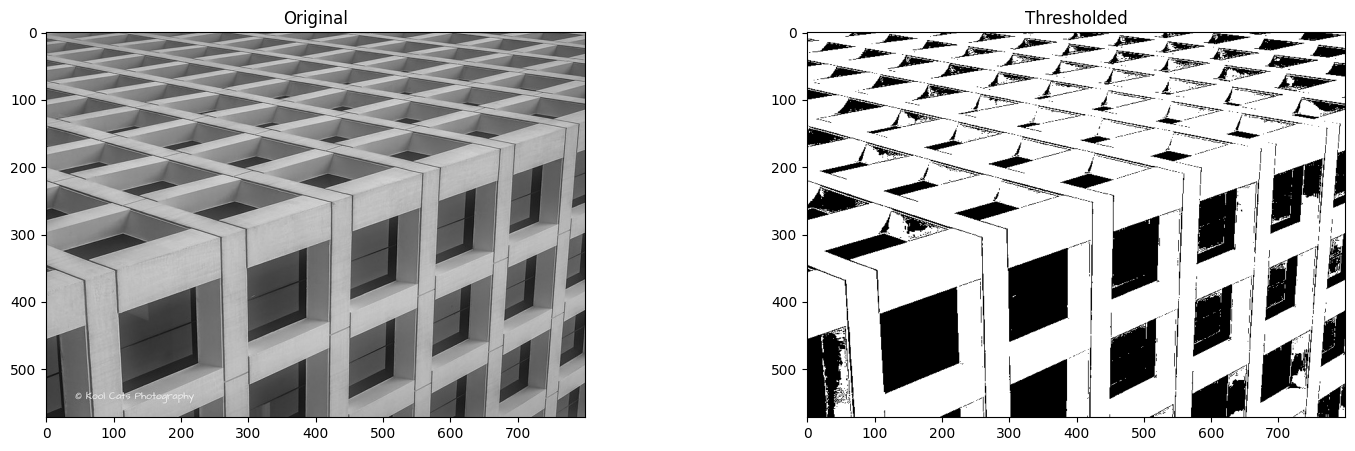

In [21]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_read, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_thresh, cmap="gray")
plt.title("Thresholded")

plt.show()

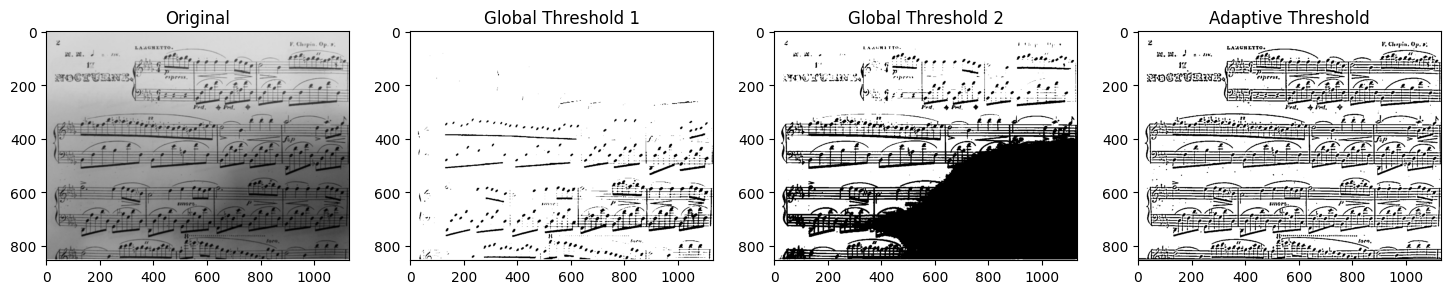

In [22]:
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_read, cmap="gray")
plt.title("Original")

plt.subplot(1, 4, 2)
plt.imshow(img_thresh_gbl_1, cmap="gray")
plt.title("Global Threshold 1")

plt.subplot(1, 4, 3)
plt.imshow(img_thresh_gbl_2, cmap="gray")
plt.title("Global Threshold 2")

plt.subplot(1, 4, 4)
plt.imshow(img_thresh_adp, cmap="gray")
plt.title("Adaptive Threshold")

plt.show()

# Bitwise operations

(200, 499)


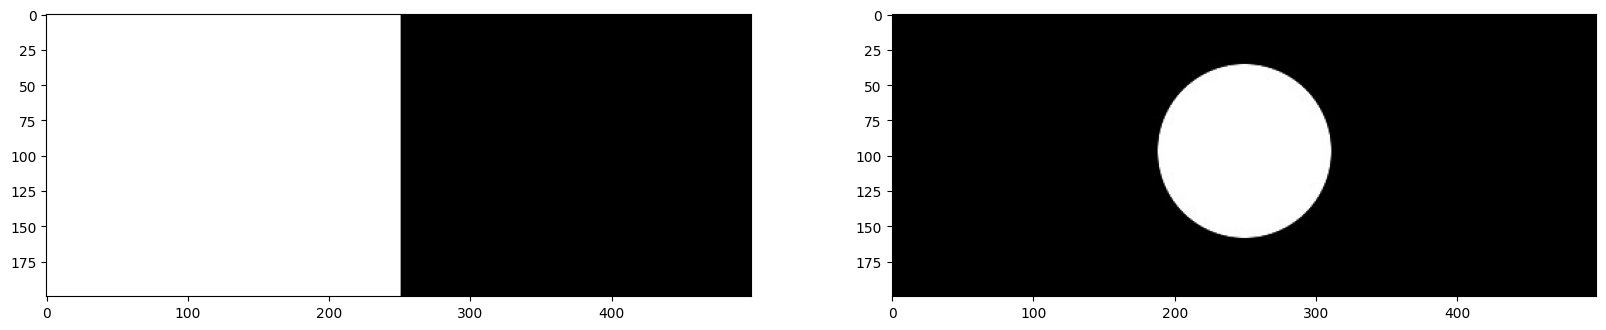

In [23]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

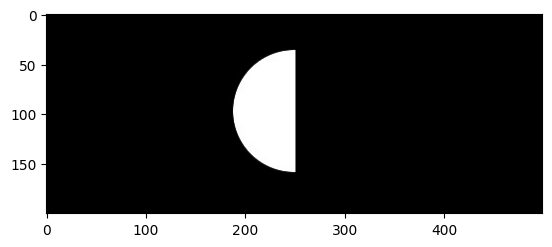

In [24]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

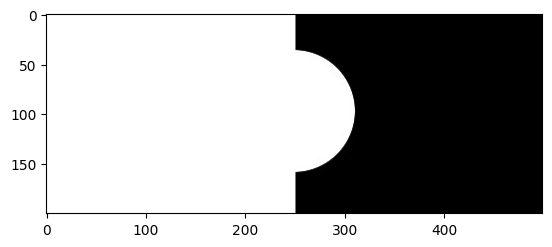

In [25]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

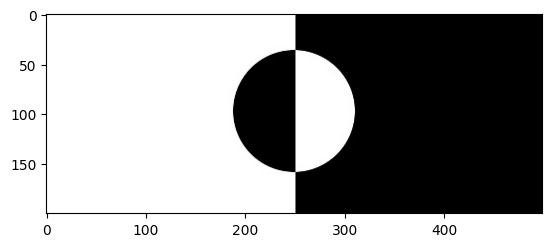

In [26]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

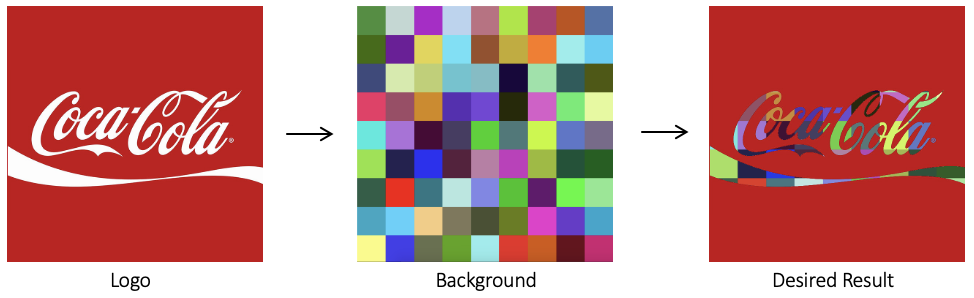

In [27]:
Image(filename='Logo_Manipulation.png')

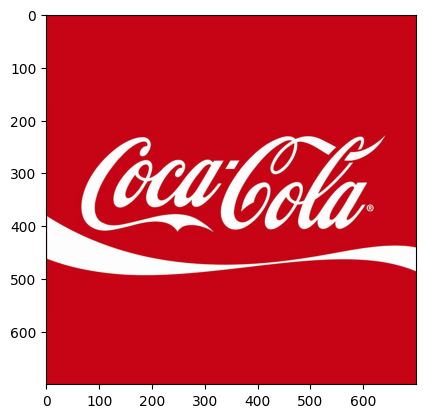

In [33]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

(700, 700, 3)


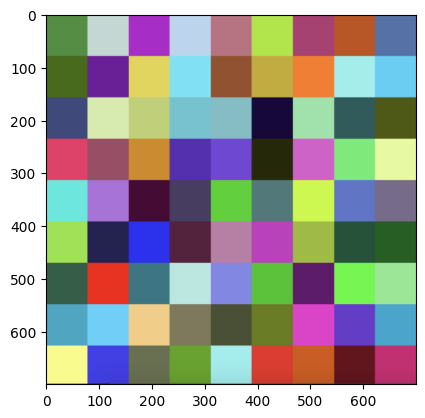

In [34]:
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

logo_w = img_rgb.shape[0]
logo_h = (logo_w / img_background_rgb.shape[1]) * img_background_rgb.shape[0]
dim = (logo_w, int(logo_h))

img_resized = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_resized)
print(img_resized.shape)

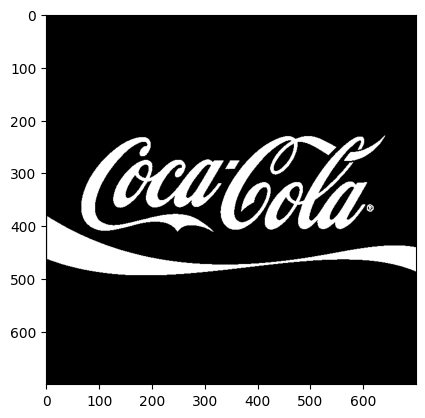

In [47]:
retval , img_mask = cv2.threshold(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), 100, 255, cv2.THRESH_BINARY)
plt.imshow(img_mask, cmap="gray")

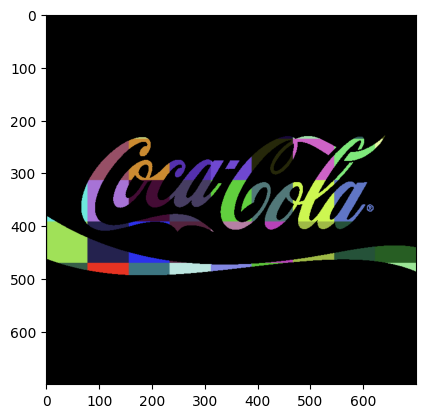

In [62]:
foreground = cv2.bitwise_and(img_resized, img_resized, mask=img_mask)
plt.imshow(foreground )

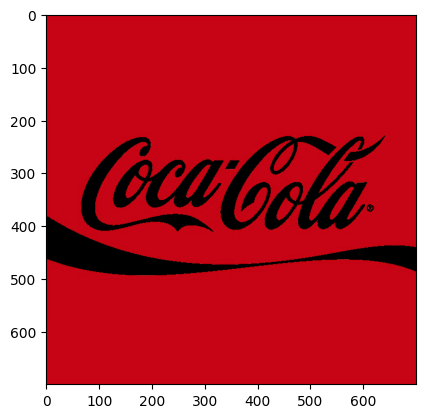

In [61]:
background = cv2.bitwise_or(img_rgb, img_rgb, mask=cv2.bitwise_not(img_mask))
plt.imshow(background)

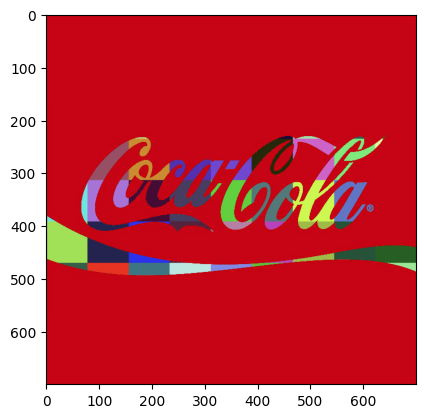

In [64]:
result = cv2.add(foreground, background)
plt.imshow(result)